<a href="https://colab.research.google.com/github/riyashah29/MlExps/blob/main/3_naivebayesscratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:Riya Shah    
Roll No.: D085  
SAP ID: 60009230017  
Branch: CSE DS-2-1

Aim: Implement Naïve Bayes Classifier on a given Dataset.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df1=pd.read_csv("/content/Social_Network_Ads (1) (1).csv")
df1.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df2=pd.read_csv("/content/Breast_cancer_data (1).csv")
df2.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


#dataset 1 preprocessing

In [ ]:
df1=df1.drop_duplicates()

In [ ]:
df1.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


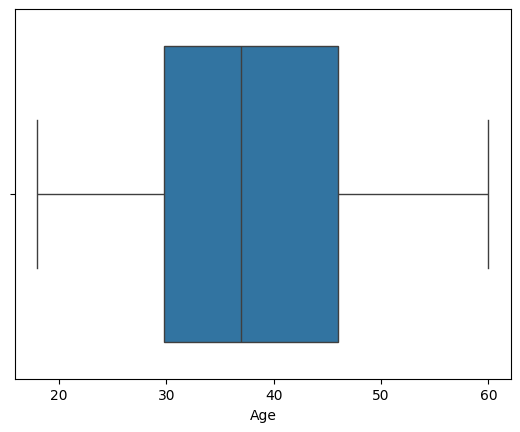

In [ ]:
sns.boxplot(x=df1['Age'])
plt.show()

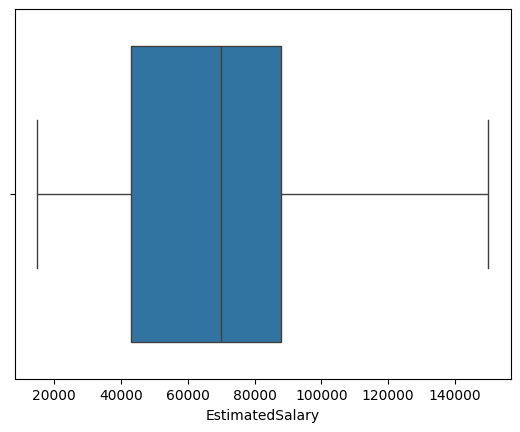

In [ ]:
sns.boxplot(x=df1['EstimatedSalary'])
plt.show()

outliers arent significant to make a difference


#Dataset 2 Preprocessing

In [ ]:
df2=df2.drop_duplicates()

In [ ]:
df2.isnull().sum()

,0
mean_radius,0
mean_texture,0
mean_perimeter,0
mean_area,0
mean_smoothness,0
diagnosis,0


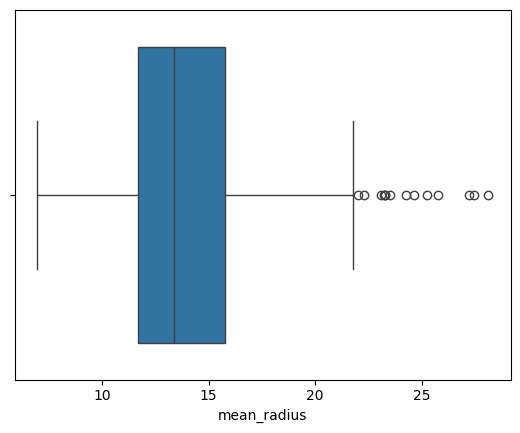

In [ ]:
sns.boxplot(x=df2['mean_radius'])
plt.show()

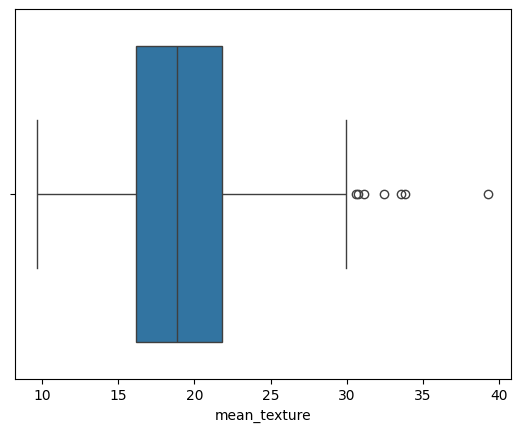

In [ ]:
sns.boxplot(x=df2['mean_texture'])
plt.show()

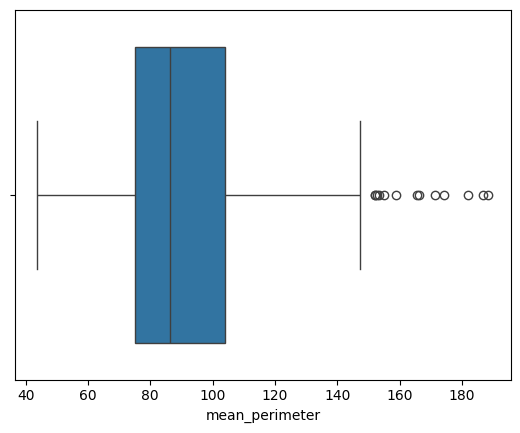

In [ ]:
sns.boxplot(x=df2['mean_perimeter'])
plt.show()

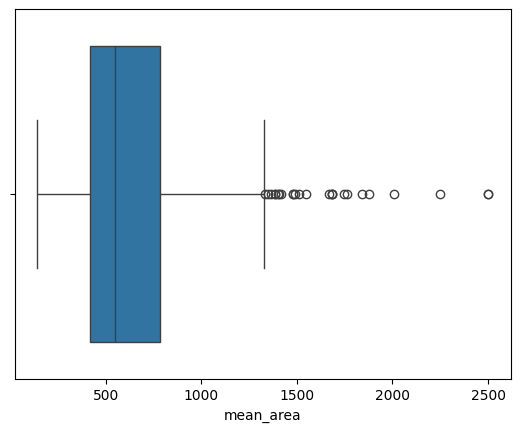

In [ ]:
sns.boxplot(x=df2['mean_area'])
plt.show()

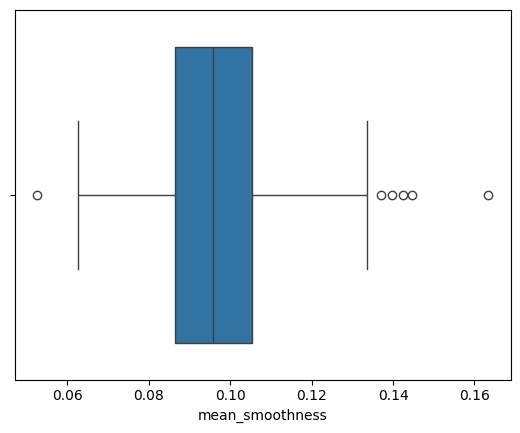

In [ ]:
sns.boxplot(x=df2['mean_smoothness'])
plt.show()

outliers arent significant to make a difference

#dataset 1 model fitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB

In [ ]:
gender_mapping = {'Male': 0, 'Female': 1}

df1['Gender'] = df1['Gender'].map(gender_mapping)

In [ ]:
df1.drop('User ID',axis=1,inplace=True)

In [ ]:
df1["EstimatedSalary"] = (df1["EstimatedSalary"] - df1["EstimatedSalary"].min()) / (df1["EstimatedSalary"].max() - df1["EstimatedSalary"].min())

In [ ]:
df1.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,0.029630,0
1,0,35,0.037037,0
2,1,26,0.207407,0
3,1,27,0.311111,0
4,0,19,0.451852,0


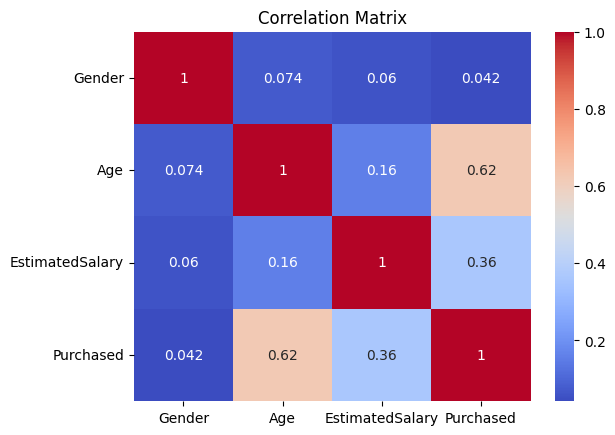

In [ ]:
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Purchased', axis=1), df1['Purchased'], test_size=0.2, random_state=42)

In [ ]:
clf=GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
confusion=confusion_matrix(y_test,y_pred)
print(confusion)

[[50  2]
 [ 3 25]]


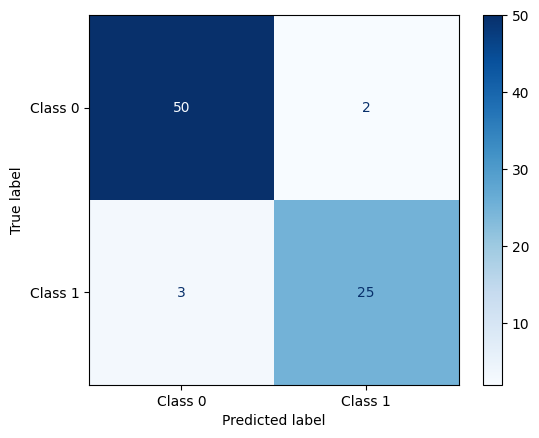

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9375


In [ ]:
train_accuracy = clf.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.8625


In [ ]:
test_accuracy = clf.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9375


#Fitting model on dataset 2

In [ ]:
df2.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
df2.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


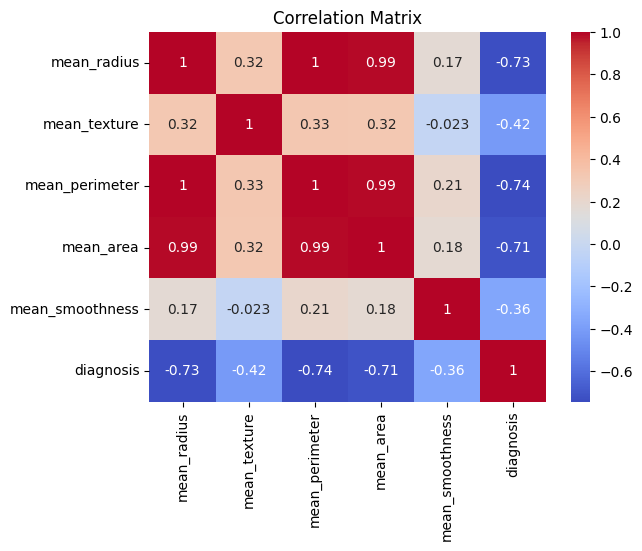

In [ ]:
corr_matrix = df2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df2.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [ ]:
df2["mean_area"] = (df2["mean_area"] - df2["mean_area"].min()) / (df2["mean_area"].max() - df2["mean_area"].min())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop('diagnosis', axis=1), df2['diagnosis'], test_size=0.2, random_state=42)

In [ ]:
clf=GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
acc=accuracy_score(y_test,y_pred)
print(acc)

0.9473684210526315


In [ ]:
acc=accuracy_score(y_train,clf.predict(X_train))
print(acc)

0.8967032967032967


[[37  6]
 [ 0 71]]


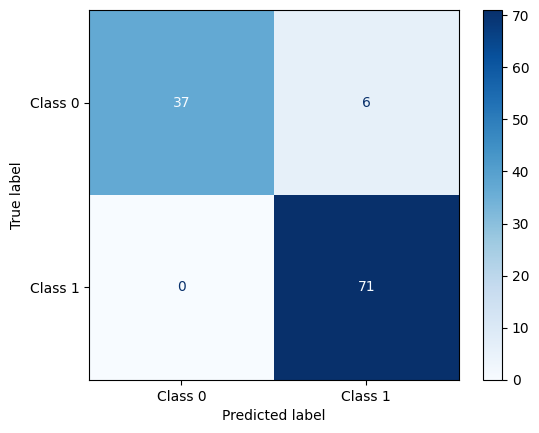

In [ ]:
confusion=confusion_matrix(y_test,y_pred)
print(confusion)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)

plt.show()

#Fit naive bayes from scratch on dataset 3

In [ ]:
df3=pd.read_csv('/content/diabetes.csv')
df3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
def calculate_prior(df,Y):
  classes=sorted(list(df[Y].unique()))
  prior=[]
  for i in classes:
    prior.append(len(df[df[Y]==i])/len(df))
  return prior

In [ ]:
def calculate_likelihood_gaussian(df,feat_name,feat_val,Y,label):
  feat=list(df.columns)
  df=df[df[Y]==label]
  mean,std=df[feat_name].mean(),df[feat_name].std()
  p_x_given_y=(1/np.sqrt(2*np.pi*std**2))*np.exp(-((feat_val-mean)**2/(2*std**2)))
  return p_x_given_y

In [ ]:
import pandas as pd
import numpy as np

def naive_bayes_gaussian(df, X, Y):
  features = list(df.columns)[:-1]
  prior = calculate_prior(df, Y)
  Y_pred = []
  for index in X.index:
    x = X.loc[index].values
    labels = sorted(list(df[Y].unique()))
    likelihood = [1] * len(labels)
    for j in range(len(labels)):
      for i in range(len(features)):
        likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

    posterior = [1] * len(labels)
    for j in range(len(labels)):
      posterior[j] = likelihood[j] * prior[j]
    Y_pred.append(np.argmax(posterior))
  return np.array(Y_pred)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df3.drop('Outcome', axis=1), df3['Outcome'], test_size=0.2, random_state=42)

In [ ]:
p=calculate_prior(df3,'Outcome')
print(p)

[0.6510416666666666, 0.3489583333333333]


In [ ]:
Y_pred=naive_bayes_gaussian(df3,X_train,'Outcome')

In [ ]:
accuracy=accuracy_score(y_train,Y_pred)
print(accuracy)

0.754071661237785


In [ ]:
accuracy=accuracy_score(y_test,naive_bayes_gaussian(df3,X_test,'Outcome'))
print(accuracy)

0.7922077922077922


[[81 18]
 [14 41]]


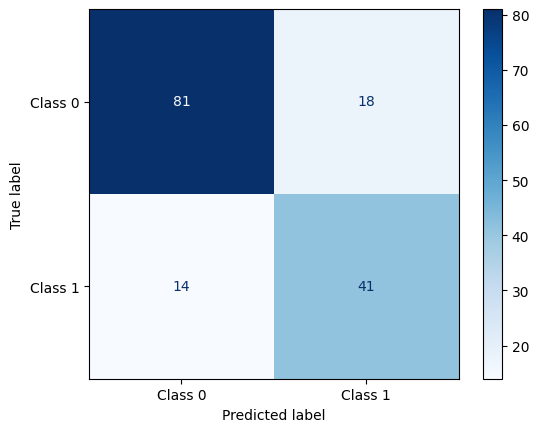

In [ ]:
cm=confusion_matrix(y_test,naive_bayes_gaussian(df3,X_test,'Outcome'))
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)

plt.show()

#Colab link:https://colab.research.google.com/drive/1idO4mhzGT44e3pNT7IWrevEhg_gIASF5?usp=sharing